# **Single Systems**

### Vectors and matrices in Python

In [3]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

ket0/2 + ket1/2

array([0.5, 0.5])

In [4]:
M1 = array([ [1, 1], [0, 0] ])
M2 = array([ [1, 1], [1, 0] ])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

In [5]:
from numpy import matmul

display(matmul(M1,ket1))
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

### States, measurements, and operations in Qiskit

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [7]:
display(u.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [8]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

### Simulating measurements using `Statevector`

In [9]:
v = Statevector([(1+2.j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [13]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 563, '1': 437}

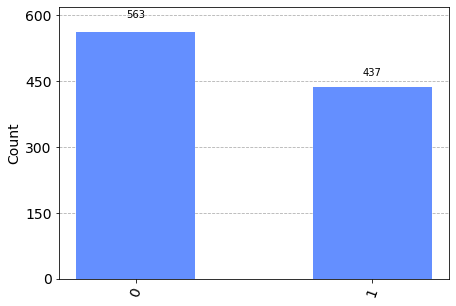

In [21]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

### Performing operations with `Operator` and `Statevector`

In [22]:
from qiskit.quantum_info import Operator

X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits

In [23]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [25]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

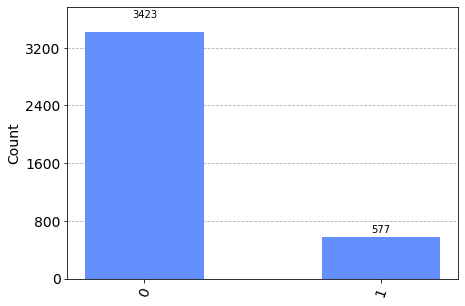

In [28]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)